In [1]:

import numpy as np
import math
from qiskit.circuit import Parameter
from qiskit import *
from math import pi,cos,sin,tan,atan
#from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import QasmSimulator
def execute_circuit_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    qobj = assemble(quantum_circuit, statevector_simulator)
    result = statevector_simulator.run(qobj).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw('mpl')
    b_sphere = plot_bloch_multivector(statevector_results)

    return statevector_results, circuit_diagram, b_sphere 

In [2]:

param_theta = Parameter('θ')
n = int(input("Enter the number of qubits(Max no. 5):  "))
bell = QuantumCircuit(n, name='entanglement')
rot = int(input("Press 1 to select RX gate, 2 for RY gate"))
if rot==1:
   bell.rx(param_theta,0)
elif rot==2:
    bell.ry(param_theta,0)
else:
    print("Please Enter the correct option")

control = int(input("Press 1 to use CNOT gate and 2 for CY gate"))
if control==1:
    for i in range (0,n-1):
        bell.cx(i,i+1)
elif control==2:
    for j in range(0,n-1):
        bell.cy(j,j+1)
else:
    print("Please press the correct option")

Enter the number of qubits(Max no. 5):   3
Press 1 to select RX gate, 2 for RY gate 1
Press 1 to use CNOT gate and 2 for CY gate 1


In [3]:
    import numpy as np
    from math import pi,cos,sin,tan,atan
    x = float(input("Enter the angle multiplier: "))

    bell = bell.assign_parameters({param_theta:  (x * np.pi)})


Enter the angle multiplier:  0.6


In [4]:
result, img, bsphere = execute_circuit_sv(bell)
img.savefig('img.png')
bsphere.savefig('bsphere.png')

/var/folders/y7/ccw1r_j95vbbswqv7lqbg04c0000gn/T/ipykernel_891/2883567162.py:15: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = statevector_simulator.run(qobj).result()


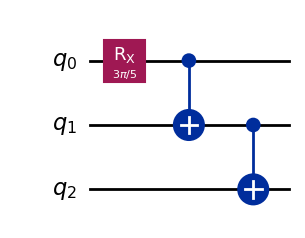

In [5]:
img

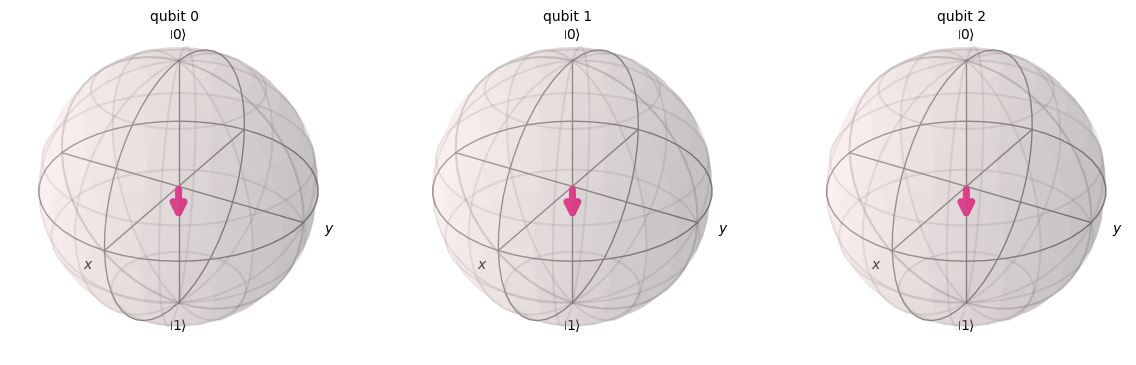

In [6]:
bsphere

In [7]:
print(result)

Statevector([0.58778525+0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        -0.80901699j],
            dims=(2, 2, 2))


In [8]:
from qiskit.quantum_info import DensityMatrix, partial_trace

In [9]:
D = DensityMatrix(bell)
print(D)


DensityMatrix([[0.3454915+0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.47552826j],
               [0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ],
               [0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ],
               [0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ,
                0.       +0.j        , 0.       +0.j        ],
    

In [10]:
from qiskit.quantum_info import entropy
vn_entropy = entropy(D, base=2)
print(vn_entropy)

0.0


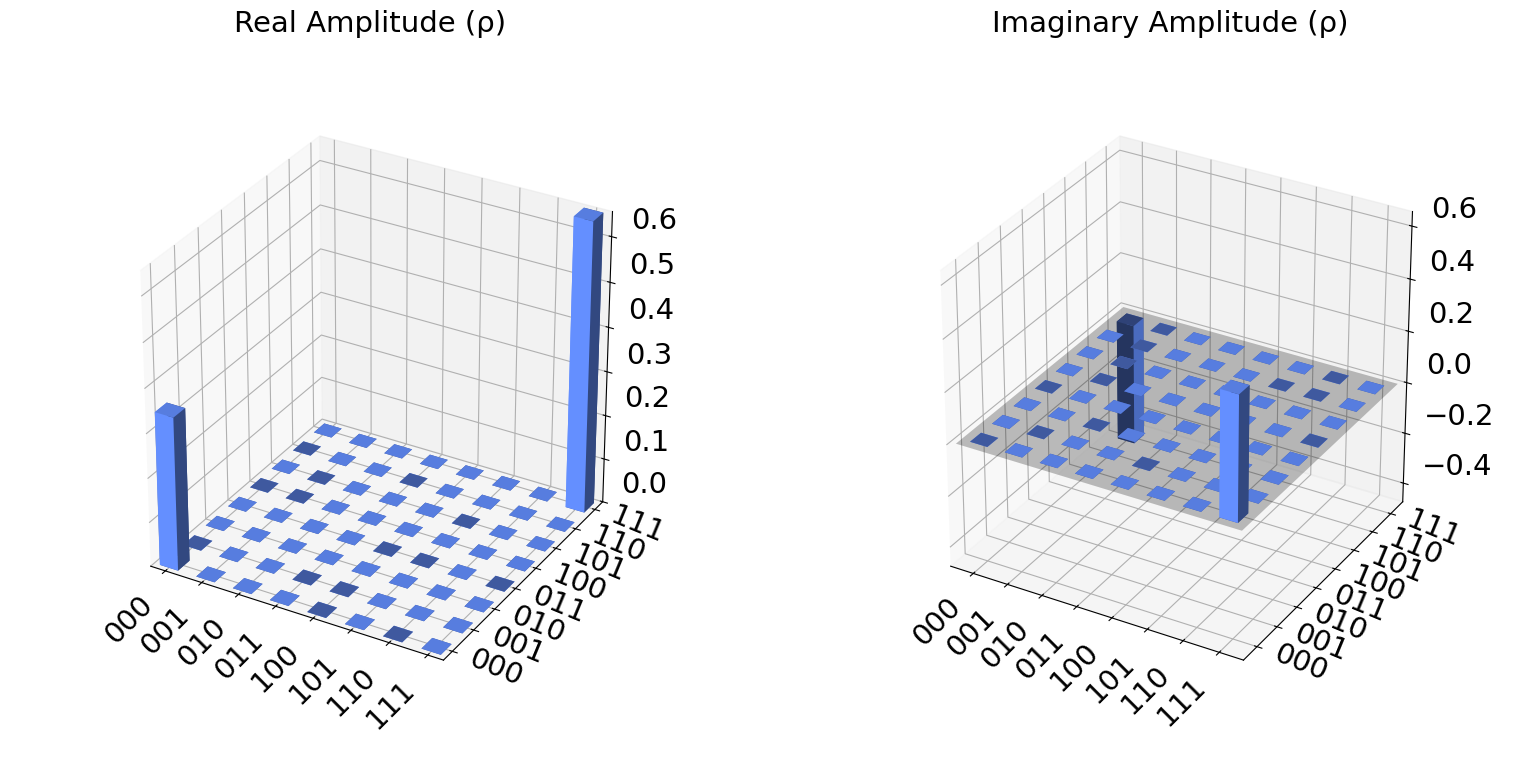

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(D)

Enter the index no. of qubit for which you want to perform partial trace(0-(n-1)):  1


DensityMatrix([[0.3454915+0.j, 0.       +0.j, 0.       +0.j,
                0.       +0.j],
               [0.       +0.j, 0.       +0.j, 0.       +0.j,
                0.       +0.j],
               [0.       +0.j, 0.       +0.j, 0.       +0.j,
                0.       +0.j],
               [0.       +0.j, 0.       +0.j, 0.       +0.j,
                0.6545085+0.j]],
              dims=(2, 2))


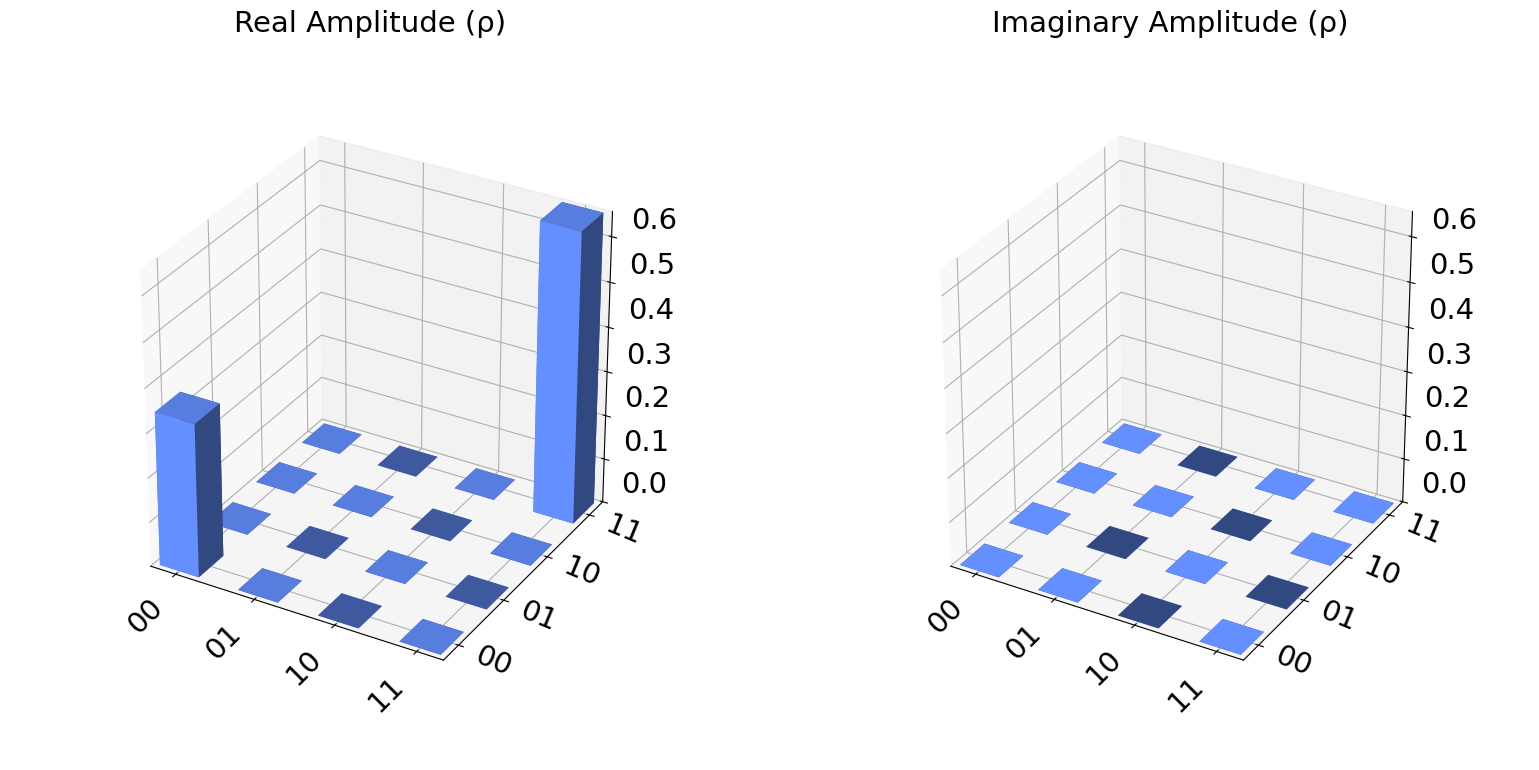

In [12]:
qp = int(input("Enter the index no. of qubit for which you want to perform partial trace(0-(n-1)): "))
p = partial_trace(D,[qp]) #trace out nth qubit
print(p)
plot_state_city(p)

In [13]:
r = x / 0.5
if x % 0.5 == 0 and r % 2 != 0:
    print("Maximal Entanglement")
else:
    print("Partial Entanglement")

Partial Entanglement
